# 0.0 Import

In [1]:
import pickle
import numpy    as np
import pandas   as pd
from matplotlib import pyplot as plt

from IPython.display import HTML

from sklearn import ensemble as en

## 0.1 Help functions

In [2]:
# Supressão de Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
# Corrigir Gráficos Jupter

def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [16, 12]
    plt.rcParams['font.size'] = 12

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

jupyter_settings()

## 0.2 Load interim data

In [4]:
x_treino = pickle.load( open( "../data/interim/x_treino.pkl", "rb" ) )
y_treino = pickle.load( open( "../data/interim/y_treino.pkl", 'rb' ) )
x_validacao = pickle.load( open( "../data/interim/x_validacao.pkl", "rb" ) )
y_validacao = pickle.load( open( "../data/interim/y_validacao.pkl", "rb" ) )

# 1.0 Feature Selection

In [10]:
forest = en.ExtraTreesClassifier( n_estimators= 250, random_state= 0, n_jobs= -1)

forest.fit(x_treino, y_treino.values)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

## 1.1 Buscando melhores Features

Feature ranking:
                   feature  importance
0    cliente_dias_contrato    0.274003
0             premio_anual    0.245602
0                    idade    0.164292
0            codigo_regiao    0.106514
0       veiculo_danificado    0.068827
0          contato_cliente    0.058596
0  seguro_previo_automovel    0.054535
0          idade_veiculo_1    0.013980
0          idade_veiculo_2    0.006173
0                   genero    0.004849
0          idade_veiculo_3    0.002132
0                      cnh    0.000496


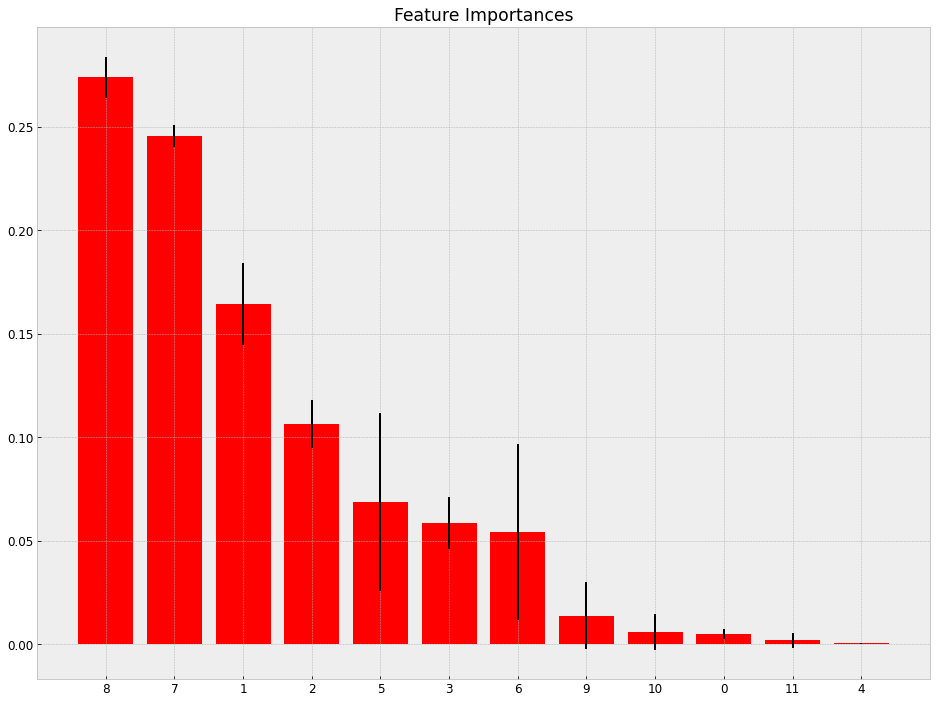

In [23]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_treino, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat( [df, aux], axis = 0)

print( df.sort_values( by = 'importance', ascending = False ) )

plt.figure()
plt.title('Feature Importances')
plt.bar(range(x_treino.shape[1]), importances[indices], color = 'r', yerr=std[indices], align='center')
plt.xticks(range(x_treino.shape[1]), indices)
plt.xlim([-1, x_treino.shape[1]])
plt.show()


## 1.2 Selecionando Features

In [ ]:
cols_selected = ['cliente_dias_contrato', 'premio_anual', 'idade','codigo_regiao',
                 'veiculo_danificado', 'contato_cliente', 'seguro_previo_automovel'] 

x_treino = x_treino[cols_selected]
x_validacao = x_validacao[cols_selected]

# 2.0 Export Pickle processed data

In [ ]:
pickle.dump( x_treino, open( "../data/processed/x_treino.pkl", 'wb' ) )
pickle.dump( y_treino, open( "../data/processed/y_treino.pkl", 'wb' ) )

pickle.dump( x_validacao, open( "../data/processed/x_validacao.pkl", 'wb' ) )
pickle.dump( y_validacao, open( "../data/processed/y_validacao.pkl", 'wb' ) )